<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#CVAE" data-toc-modified-id="CVAE-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>CVAE</a></span><ul class="toc-item"><li><span><a href="#Create-the-data" data-toc-modified-id="Create-the-data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Create the data</a></span></li></ul></li><li><span><a href="#Train-the-CVAE" data-toc-modified-id="Train-the-CVAE-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Train the CVAE</a></span></li><li><span><a href="#Generate-samples" data-toc-modified-id="Generate-samples-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Generate samples</a></span></li></ul></div>

# CVAE

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.preprocessing import MinMaxScaler

import base
import cvae
import importlib
importlib.reload(cvae)

import tensorflow as tf
tf.compat.v1.disable_eager_execution()

## Create the data

In [2]:
data, conditions = make_circles(n_samples=10000, noise=0.05, factor=0.5)

# We normalise the data to [0, 1]^2
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

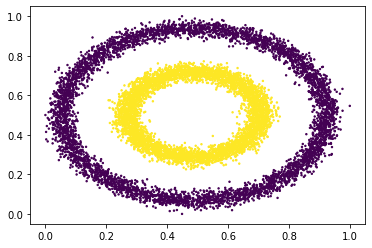

In [3]:
# Plot dataset
plt.scatter(*data.T, c=conditions, s=2)
plt.show()

# Train the CVAE

In [4]:
generator = cvae.CVAE(n_latent=4, alpha=0.02)
generator.train(data, data_cond=conditions.reshape(-1, 1),
                n_epochs=10000)

Training:   0%|          | 0/10000 [00:00<?, ?it/s]

# Generate samples

In [5]:
outer_circle_generated = generator.generate((0,), n_samples=1000)
inner_circle_generated = generator.generate((1,), n_samples=1000)

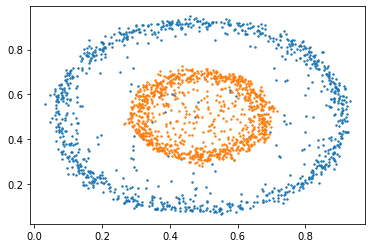

In [6]:
plt.scatter(*outer_circle_generated.T, s=2)
plt.scatter(*inner_circle_generated.T, s=2)
plt.show()